# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [79]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("Train -> Features:", len(X_train), "Label:", len(y_train))
print("Test -> Features:", len(X_test), "Label:", len(y_test))

Train -> Features: 39209 Label: 39209
Test -> Features: 12630 Label: 12630


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [80]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

13
6
17
4
5


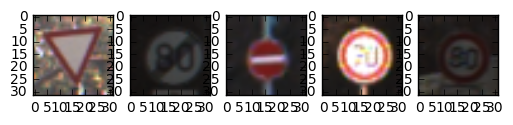

In [81]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline


# plt.figure(figsize=(1,1))
# plt.imshow(image, cmap="gray")
# print(y_train[index])


for i in range(1,6):
    plt.subplot(150 + i)
    index = random.randint(0, len(X_train)) # Get random index
    image = X_train[index].squeeze()
    plt.imshow(image)
    print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [82]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

print("Performed Preprocessing -> shuffle")



Performed Preprocessing -> shuffle


### Training Pipeline 

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I shuffled the images using the sklearn utils shuffle api. I chose to leave the images in the rgb color channels, because in my opinion it's seems to be a better unique identifier for traffic signs. Signs could look very similar but a green or red image could represent go or stop respectively.


In [83]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split
X = X_train # initial train features
y = y_train # initial train labels

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=42)

print("Performed Preprocessing")
print("Number of training examples =", len(X_train))
print("Number of testing examples =", len(X_test))
print("Number of validation examples =", len(X_validation))
print("Image data shape =", X_train[0].shape)
print("Number of classes =", len(set(y_train)))


Performed Preprocessing
Number of training examples = 31367
Number of testing examples = 12630
Number of validation examples = 7842
Image data shape = (32, 32, 3)
Number of classes = 43


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

I used train_test_split from sklearn.model_selection. I chose this technique because the official documentation states that the algorithm splits arrays or matrices into random train and test subsets. All these are achieved in a convenient one-liner that wraps input validation and other useful tunning parameters. For my solution I chose to use 20% for validation

In [84]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

# Load Tensorflow
import tensorflow as tf
from tensorflow.contrib.layers import flatten

# Optionally reset graph to fix error
# tf.reset_default_graph()

### Define LeNet Architecture
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0, fc1_W) + fc1_b

    # Activation.
    fc1 = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1, fc2_W) + fc2_b

    # Activation.
    fc2 = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43 classes/labels.
    fc3_W = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My architecture models from the LeNet architecture, and contains 5 layers. The first layer accepts an input shape of (32, 32, 3). The depth 3 represents the rgb color channels. The architecture goes through 2 convolutional layers and 3 fully connected layers. The architecture goes through ReLu activations, max_pooling etc. and finally returns a logit from the last fully connected layer which accepts an output of 43 representing the number of unique labels/classes in the data set.

**Training pipeline**

In [85]:
### Train your model here.
### Feel free to use as many code cells as needed.

rate = 0.001
EPOCHS = 1
BATCH_SIZE = 128
rate = 0.001
depth = 3 # rgb image
x = tf.placeholder(tf.float32, (None, 32, 32, depth)) # placeholder for input images.
y = tf.placeholder(tf.int32, (None)) # placeholder for output labels.
one_hot_y = tf.one_hot(y, 43) 

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# print("logits:", logits)
# print("cross_entropy:", cross_entropy)
# print("loss_operation:", loss_operation)
# print("optimizer:", optimizer)
# print("training_operation:", training_operation)
print("Successfully setup training pipeline")



Successfully setup training pipeline


**Model Evaluation**

In [86]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

**Train the model**

In [87]:
### Train your model here.
### Feel free to use as many code cells as needed.
import time

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    # Optionally continue training with last model
    ckpt = tf.train.get_checkpoint_state("./")
    if ckpt and ckpt.model_checkpoint_path:
        saver = tf.train.import_meta_graph('lenet.meta')
        saver.restore(sess, tf.train.latest_checkpoint('./'))
        print("Model found and restored. Continue training from last checkpoint")
    else:
        saver = tf.train.Saver()
        print("No checkpoint file found. Creating initial saver and Starting new training")
    
    
    start_time = time.time()
    print("Training...")
    print("start_time:", start_time)
    
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        
        if i%5 == 0 or i == (EPOCHS - 1):
            print("EPOCH {} ...".format(i+1))
            print("Validation Accuracy = {:.3f}".format(validation_accuracy))
            print()
            
    saver.save(sess, 'lenet')
    print("Model saved as lenet")
    
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
    

    print("Training done")  
    total_time = (time.time() - start_time) / 60
    print("Total time: {:.2f} mins".format(total_time))


Model found and restored. Continue training from last checkpoint
Training...
start_time: 1484846158.954565
EPOCH 1 ...
Validation Accuracy = 0.970

Model saved as lenet
Test Accuracy = 0.870
Training done
Total time: 0.46 mins


**Evaluating the Model**

In [88]:
import tensorflow as tf

with tf.Session() as sess:
    ckpt = tf.train.get_checkpoint_state("./")
    if ckpt and ckpt.model_checkpoint_path:
        saver = tf.train.import_meta_graph('lenet.meta')
        saver.restore(sess, tf.train.latest_checkpoint('./'))
        print("Model found and restored.")
        
        test_accuracy = evaluate(X_test, y_test)
        print("Test Accuracy = {:.3f}".format(test_accuracy))

    

Model found and restored.
Test Accuracy = 0.870


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Before each Epoch I made sure to shuffle to data and afterwards measured the validation test set's loss and accuracy. I applied Adamoptimizer with the recommended learning rate of 0.001. I used a batch size of 128 and an epoch of 50. I also used the default recommended hyperparameters mu = 0 and sigma = 0.1

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

The LeNet architecture is a well known architecture used in image classification. I didn't do a lot fine tunning with parameters especially because of computation constraints. Unfortunately I used my regular macbook to train the model which is runs very slowly. However with an Epoch of 5 I was able to achieve a validation accuracy of over 90% and a test accuracy of about 85%. Further more, I have improved the numbers by re-training on the saved model. validation accuracy is now 97% and the test accuracy 87%.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

In [89]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


def get_web_imgs():
    
    web_imgs = []
    web_imgs_path = []
    folder = "web-traffic-signs/"
    fileList = os.listdir(folder)

    i = 0
    for x in fileList:
        if x != ".DS_Store":
            imgPath = folder + x
            img = cv2.imread(imgPath)
    #         print("old img shape:", img.shape)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (32, 32))
#             print("img path:", imgPath)
#             print("resized img shape:", img.shape)
            web_imgs.append(img)
            web_imgs_path.append(imgPath)
            i = i+1
            plt.subplot(5, 5, i) # i not more than 5
            plt.imshow(img)
    
    web_imgs = np.array(web_imgs, dtype=np.int32) 
    return web_imgs, web_imgs_path


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

Yes, the resultion or size of images can affect the classification. Classification would be more difficult in the poor resultion images, because resizing the images to 32 by 32 pixels could lead to unexpected results in the visual display of the image. Also Background graphics add a lot of noise to the data, hence making classification more difficult. 

web_imgs batch shape:  (5, 32, 32, 3) 

Model found and restored.
classification:  [14 26  6  1  5]
Image Paths:  ['web-traffic-signs/img_0.jpg', 'web-traffic-signs/img_1.jpg', 'web-traffic-signs/img_2.jpg', 'web-traffic-signs/img_3.jpg', 'web-traffic-signs/img_4 copy.jpg']
classification completed


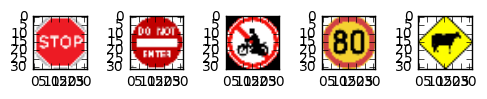

In [90]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
### Run the predictions on web images here.

# count = len(web_imgs)
web_imgs, web_imgs_path = get_web_imgs()
print("web_imgs batch shape: ", web_imgs.shape, "\n")

with tf.Session() as sess:
    ckpt = tf.train.get_checkpoint_state("./")
    if ckpt and ckpt.model_checkpoint_path:
        saver = tf.train.import_meta_graph('lenet.meta')
        saver.restore(sess, tf.train.latest_checkpoint('./'))
        print("Model found and restored.")

        softmax_prediction = tf.nn.softmax(logits)
        softmax_probability = sess.run(softmax_prediction, feed_dict={x: web_imgs})

        # Classification using argmax prediction
        argmax_prediction = tf.argmax(logits,1)
        classification = argmax_prediction.eval(feed_dict={x: web_imgs})
        print("classification: ", classification)
        print("Image Paths: ", web_imgs_path)

        # Classification using softmax probability
        #     print("pred: ", pred)
#         print("classification for img_0: ", np.argmax(softmax_probability[0]))
#         print("classification for img_1: ", np.argmax(softmax_probability[1]))
#         print("classification for img_2: ", np.argmax(softmax_probability[2]))
#         print("classification for img_3: ", np.argmax(softmax_probability[3]))
#         print("classification for img_4: ", np.argmax(softmax_probability[4]))
        print("classification completed")
        
        

          


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

No, my model is not able to perform equally well. It correctly predicted img_0 as Label 14("Stop"). It only predicted 1 out of the 5 captured traffic sign images correctly, therefore it has a 20% prediction accuracy. Not as good as the prediction accuracy on the training set which is about 97%. The possible reason why my model didn't do well in a real world situation with the captured images could be:

1. Needs more training data. The more data the model gets the better it performs.
2. Different Locale (Language etc.). The model was trained using German traffic sign images, while the captured images could be from a different region.
3. Additional reasons could also be related to the variation in the image properties e.g. size, resolution, background textures etc. These could introduce a lot of noise to the data, as well as lost information if resized.

In [91]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    for i in range(len(web_imgs)):
        prob = softmax_probability[i]
        print("softmax_probability for img_{}: {}".format(i, prob))
        print()

softmax_probability for img_0: [  3.40968254e-10   8.19922463e-10   8.19015185e-08   5.46657532e-07
   1.33679309e-13   7.23396126e-12   8.65489133e-17   1.46772067e-13
   3.14402976e-10   6.98302017e-07   3.04818754e-10   4.09223389e-07
   4.26083989e-06   2.61483074e-04   9.99724209e-01   2.15338622e-10
   2.40056169e-11   1.06334639e-08   6.70107036e-13   3.16240632e-12
   1.52461273e-11   2.51929411e-09   4.99319308e-10   1.42245005e-09
   7.40185975e-14   3.92644885e-08   1.02318473e-10   3.75679998e-18
   3.11489966e-11   1.28583235e-06   6.75748515e-06   7.09252535e-13
   4.84894616e-14   2.68191528e-11   9.69299224e-11   3.00452108e-10
   2.32564705e-12   3.58819311e-13   1.93214234e-07   1.30374861e-20
   5.94562961e-15   8.70177276e-16   2.94455486e-17]

softmax_probability for img_1: [  1.33347311e-09   5.81181422e-11   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   9.30344353e-29   6.69095704e-36   0.00000000e+00   0.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

The real world prediction accuracy is only 20%. Looking at other predictions for e.g. the prediction for the stop sign image "img_1". The prediction of Label 26 is wrong, however the correct label 17 ("No Entry") is included in the top 3 predctions. The top 3 predictions returned Label indices 26, 17, 0 with softmax probabilities of 9.99987841e-01,   1.21618777e-05,   1.33347311e-09 respectively. The probalities represent the levels of certainty of the model's prediction. Based on the data visualized in the plotted chart below. The model seems to be very certain of the guesses made. This doesn't seem right, especially since it is only 20% accurate. Nonetheless, Even though the first guess for img_1 was wrong, the next guess could have been correct. There is room for improvement but the model seems to be on the right track.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In [92]:
import matplotlib.pyplot as plt
import numpy as np

valuesCollection = []
indicesCollection = []

with tf.Session() as sess:
    for i in range(5):
        prob = softmax_probability[i]
        print("classification for img_{}: {}".format(i, np.argmax(prob)))
        top_k = sess.run(tf.nn.top_k(prob, 3))
        print("Top K=3 probabilties for img_{}: {} \n".format(i, top_k))
        values, indices = top_k
        valuesCollection.append(values)
        indicesCollection.append(indices)
        

classification for img_0: 14
Top K=3 probabilties for img_0: TopKV2(values=array([  9.99724209e-01,   2.61483074e-04,   6.75748515e-06], dtype=float32), indices=array([14, 13, 30], dtype=int32)) 

classification for img_1: 26
Top K=3 probabilties for img_1: TopKV2(values=array([  9.99987841e-01,   1.21618777e-05,   1.33347311e-09], dtype=float32), indices=array([26, 17,  0], dtype=int32)) 

classification for img_2: 6
Top K=3 probabilties for img_2: TopKV2(values=array([ 0.74847764,  0.11275025,  0.11194742], dtype=float32), indices=array([ 6, 26, 16], dtype=int32)) 

classification for img_3: 1
Top K=3 probabilties for img_3: TopKV2(values=array([  9.99995470e-01,   4.50708058e-06,   2.75715700e-10], dtype=float32), indices=array([ 1,  2, 12], dtype=int32)) 

classification for img_4: 5
Top K=3 probabilties for img_4: TopKV2(values=array([  9.56788838e-01,   4.31941152e-02,   9.35635580e-06], dtype=float32), indices=array([5, 8, 7], dtype=int32)) 



Plot for img_0


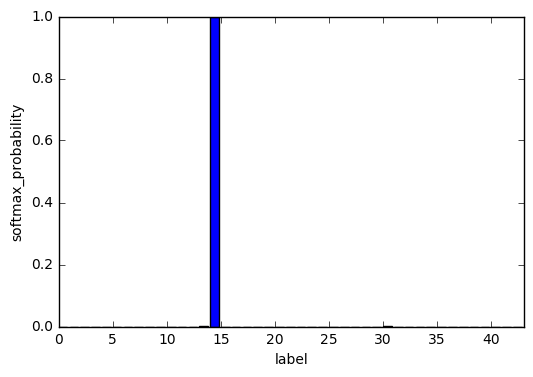

Plot for img_1


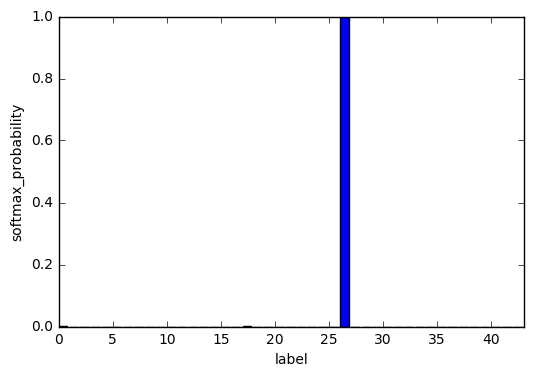

Plot for img_2


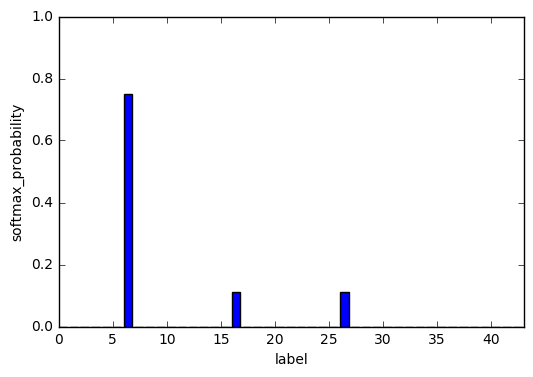

Plot for img_3


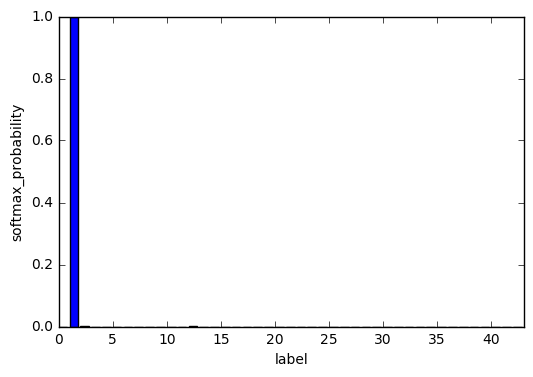

Plot for img_4


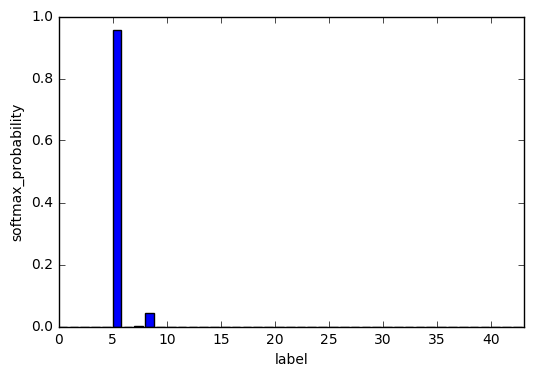

In [94]:
import matplotlib.pyplot as plt
import numpy as np

def plotChart(values=[], indices=[], num_classes=43):
    x = np.arange(num_classes)
    y = np.zeros(num_classes)
    for prob, label in zip(values, indices):
        y[label] = prob
#         print("label: {} prob: {}".format(label, prob))
    plt.bar(x, y)
    plt.xlabel('label')
    plt.ylabel('softmax_probability')
    plt.axis([0, 43.0, 0, 1.0])
    plt.show()

i = 0
for values, indices in zip(valuesCollection, indicesCollection):
        print("Plot for img_{}".format(i)) 
        i = i+1
        plotChart(values, indices, 43)

    

        